# The Sparks Foundation
## TASK 1: Prediction Using Supervised Machine Learning 
## By Ravilisetty Revathi
### Objective: To predict the percentage of a student based on the number of study hours

### Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Reading and Understanding Data

In [31]:
data= pd.read_csv('http://bit.ly/w-data')

In [32]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [33]:
data.shape

(25, 2)

In [34]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Cleaning Data

In [37]:
data.isnull().sum().sum()

0

<AxesSubplot:>

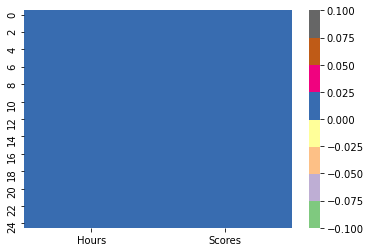

In [38]:
sns.heatmap(data.isnull(),cmap='Accent')

# Univariate Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x22888367e80>,
 'caps': [<matplotlib.lines.Line2D at 0x22888374580>,
 'boxes': [<matplotlib.lines.Line2D at 0x22888367b20>],
 'medians': [<matplotlib.lines.Line2D at 0x22888374c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x22888374fa0>],
 'means': []}

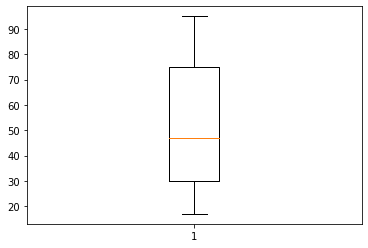

In [41]:
plt.boxplot(data['Scores'])

{'whiskers': [<matplotlib.lines.Line2D at 0x228883c8d60>,
 'caps': [<matplotlib.lines.Line2D at 0x228883d4460>,
 'boxes': [<matplotlib.lines.Line2D at 0x228883c8a00>],
 'medians': [<matplotlib.lines.Line2D at 0x228883d4b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x228883d4e80>],
 'means': []}

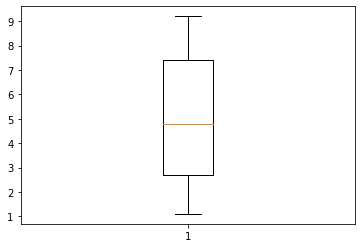

In [42]:
plt.boxplot(data['Hours'])

# Bivariate Analysis

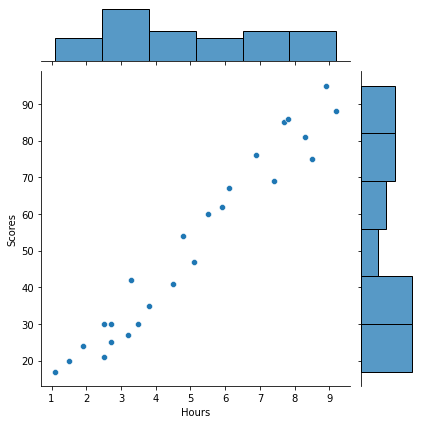

In [44]:
sns.jointplot(x='Hours', y='Scores', data=data, kind='scatter')

# Train Test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Fitting Linear Regression Model

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression()

In [65]:
lm.score(X_train,y_train) #R-squared value

0.9662064488954937

In [66]:
print(lm.intercept_)

2.1024930747922284


### Predictions from our Model

In [68]:
predictions = lm.predict(X_test)

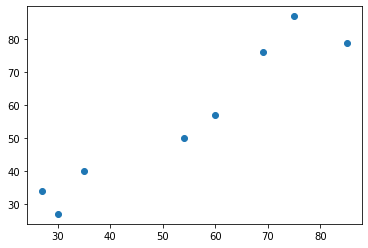

In [69]:
plt.scatter(y_test,predictions)

In [70]:
predictions

array([27.01878177, 78.84466226, 39.97525189, 75.85470762, 56.91832821,
       49.94176737, 33.99534261, 86.81787465])

In [71]:
Test_Predition_results = pd.DataFrame({'Test_Actual': y_test, 'Test_Predicted': predictions})

In [72]:
Test_Predition_results.head()

,Test_Actual,Test_Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328


In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333


## Finding how much a student scores if he studies for 9.25 hours

In [74]:
own_pred = lm.predict([[9.25]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 94.29276125536512
